In [21]:
import torch

%load_ext autoreload
%autoreload 2

print("Torch version:", torch.__version__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Torch version: 1.13.0a0+d0d6b1f


In [12]:
from utils.mnist_preprocessing import *
from torchvision import transforms

# parameters
size_of_batch = 128

# dataset preparation
train_set_gray = DatasetMNIST(root='./data',
                       env='train',
                       color=False,
                       transform= transforms.Compose([transforms.ToTensor()]))

val_set_gray = DatasetMNIST(root='./data',
                       env='val',
                       color=False,
                       transform= transforms.Compose([transforms.ToTensor()]))

test_set_gray = DatasetMNIST(root='./data',
                       env='test',
                       color=False,
                       transform= transforms.Compose([transforms.ToTensor()]))

train_set_color = DatasetMNIST(root='./data',
                       env='train',
                       color=True,
                       transform= transforms.Compose([transforms.ToTensor()]))

val_set_color = DatasetMNIST(root='./data',
                       env='val',
                       color=True,
                       transform= transforms.Compose([transforms.ToTensor()]))

test_set_color = DatasetMNIST(root='./data',
                       env='test',
                       color=True,
                       transform= transforms.Compose([transforms.ToTensor()]))

# dataloaders
train_loader_gray = torch.utils.data.DataLoader(dataset=train_set_gray,
                                           batch_size=size_of_batch,
                                           shuffle=True,
                                           num_workers=10)

val_loader_gray = torch.utils.data.DataLoader(dataset=val_set_gray,
                                           batch_size=size_of_batch,
                                           shuffle=True,
                                           num_workers=10)

test_loader_gray = torch.utils.data.DataLoader(dataset=test_set_gray,
                                           batch_size=size_of_batch,
                                           shuffle=True,
                                           num_workers=10)

train_loader_color = torch.utils.data.DataLoader(dataset=train_set_color,
                                           batch_size=size_of_batch,
                                           shuffle=True,
                                           num_workers=10)

val_loader_color = torch.utils.data.DataLoader(dataset=val_set_color,
                                           batch_size=size_of_batch,
                                           shuffle=True,
                                           num_workers=10)

test_loader_color = torch.utils.data.DataLoader(dataset=test_set_color,
                                           batch_size=size_of_batch,
                                           shuffle=True,
                                           num_workers=10)


MNIST dataset already exists
MNIST dataset already exists
MNIST dataset already exists
MNIST dataset already exists
MNIST dataset already exists
MNIST dataset already exists


## Choosing a model

In [13]:
import open_clip

open_clip.list_models()

['RN50',
 'RN50-quickgelu',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'RN101',
 'RN101-quickgelu',
 'roberta-ViT-B-32',
 'timm-convnext_base',
 'timm-convnext_large',
 'timm-convnext_xlarge',
 'timm-efficientnetv2_rw_s',
 'timm-resnetaa50d',
 'timm-swin_base_patch4_window7_224',
 'timm-vit_medium_patch16_gap_256',
 'timm-vit_relpos_medium_patch16_cls_224',
 'ViT-B-16',
 'ViT-B-16-plus',
 'ViT-B-16-plus-240',
 'ViT-B-32',
 'ViT-B-32-plus-256',
 'ViT-B-32-quickgelu',
 'ViT-e-14',
 'ViT-G-14',
 'ViT-g-14',
 'ViT-H-14',
 'ViT-H-16',
 'ViT-L-14',
 'ViT-L-14-280',
 'ViT-L-14-336',
 'ViT-L-16',
 'ViT-L-16-320',
 'ViT-M-16',
 'ViT-M-16-alt',
 'ViT-M-32',
 'ViT-M-32-alt',
 'ViT-S-16',
 'ViT-S-16-alt',
 'ViT-S-32',
 'ViT-S-32-alt']

In [14]:
open_clip.list_pretrained()

[('RN50', 'openai'),
 ('RN50', 'yfcc15m'),
 ('RN50', 'cc12m'),
 ('RN50-quickgelu', 'openai'),
 ('RN50-quickgelu', 'yfcc15m'),
 ('RN50-quickgelu', 'cc12m'),
 ('RN101', 'openai'),
 ('RN101', 'yfcc15m'),
 ('RN101-quickgelu', 'openai'),
 ('RN101-quickgelu', 'yfcc15m'),
 ('RN50x4', 'openai'),
 ('RN50x16', 'openai'),
 ('RN50x64', 'openai'),
 ('ViT-B-32', 'openai'),
 ('ViT-B-32', 'laion400m_e31'),
 ('ViT-B-32', 'laion400m_e32'),
 ('ViT-B-32', 'laion2b_e16'),
 ('ViT-B-32', 'laion2b_s34b_b79k'),
 ('ViT-B-32-quickgelu', 'openai'),
 ('ViT-B-32-quickgelu', 'laion400m_e31'),
 ('ViT-B-32-quickgelu', 'laion400m_e32'),
 ('ViT-B-16', 'openai'),
 ('ViT-B-16', 'laion400m_e31'),
 ('ViT-B-16', 'laion400m_e32'),
 ('ViT-B-16-plus-240', 'laion400m_e31'),
 ('ViT-B-16-plus-240', 'laion400m_e32'),
 ('ViT-L-14', 'openai'),
 ('ViT-L-14', 'laion400m_e31'),
 ('ViT-L-14', 'laion400m_e32'),
 ('ViT-L-14', 'laion2b_s32b_b82k'),
 ('ViT-L-14-336', 'openai'),
 ('ViT-H-14', 'laion2b_s32b_b79k'),
 ('ViT-g-14', 'laion2b_s12b_

In [15]:
# [('RN50', 'openai'),
#  ('RN50', 'yfcc15m'),
#  ('RN50', 'cc12m'
model, _, preprocess = open_clip.create_model_and_transforms('RN50', pretrained='openai')
model.cuda().eval()

# performances (https://github.com/mlfoundations/open_clip)
# Below are checkpoints of models trained on YFCC-15M, along with their zero-shot top-1 accuracies
# on ImageNet and ImageNetV2. These models were trained using 8 GPUs and the same hyperparameters
# described in the "Sample running code" section, with the exception of lr=5e-4 and epochs=32.
# For YFCC-15M: -> https://github.com/mlfoundations/open_clip
# ResNet-50 (32.7% / 27.9%)
# ResNet-101 (34.8% / 30.0%)
# For CC12M: -> https://github.com/google-research-datasets/conceptual-12m
# ResNet-50 (36.45%)

# there is a 400m image/text dataset, but open_clip uses the visiontransformers on these:
# https://laion.ai/blog/laion-400-open-dataset/

# performance of original clip model:
# This is a key change: by not directly optimizing for the benchmark, we show that it becomes much more
# representative: our system closes this “robustness gap” by up to 75% while matching the performance of
# the original ResNet-507 on ImageNet zero-shot without using any of the original 1.28M labeled examples.
# https://openai.com/blog/clip/
# imagenet resnet101: 76.2%
# clip VIT-L: 76.2%
# imagenet V2 resnet101: 64.3%
# clip VIT-L V2: 70.1%

# We use the 12 datasets from the well-studied evaluation
# suite introduced by (Kornblith et al., 2019) and add 15
# additional datasets in order to assess the performance of
# models on a wider variety of distributions and tasks. These
# datasets include MNIST, the Facial Expression Recognition
# 2013 dataset (Goodfellow et al., 2015), STL-10 (Coates
# et al., 2011), EuroSAT (Helber et al., 2019), the NWPURESISC45 dataset (Cheng et al., 2017), the German Traffic Sign Recognition Benchmark (GTSRB) dataset (Stallkamp et al., 2011), the KITTI dataset (Geiger et al., 2012),
# PatchCamelyon (Veeling et al., 2018), the UCF101 action
# recognition dataset (Soomro et al., 2012), Kinetics 700 (Carreira et al., 2019), 2,500 random samples of the CLEVR
# dataset (Johnson et al., 2017), the Hateful Memes dataset
# (Kiela et al., 2020), and the ImageNet-1k dataset (Deng
# et al., 2012). 

# clip paper (page 40)
# clip-RN50 on mnist: 98.3%
# clip-RN50 on imagenet: 73.3%
# RN50 on mnist: 98.3%
# RN50 on imagenet: 74.3%

# clip paper zero-shot performance (page 43)
# clip-ResNet RN50 on mnist: 66.6%
# clip-ResNet RN50 on imagenet: 59.6%

CLIP(
  (visual): ModifiedResNet(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act2): ReLU(inplace=True)
    (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act3): ReLU(inplace=True)
    (avgpool): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (

## Test performance of the clip model on the mnist dataset

In [16]:
# images in skimage to use and their textual descriptions

# Results in:
# Training accuracy:  33.85%
# Validation accuracy:  36.16%
# Test accuracy:  34.16%
descriptions1 = {
    "0": "a number with the value zero",
    "1": "a number with the value one",
    "2": "a number with the value two",
    "3": "a number with the value three",
    "4": "a number with the value four",
    "5": "a number with the value five",
    "6": "a number with the value six",
    "7": "a number with the value seven",
    "8": "a number with the value eight",
    "9": "a number with the value nine"
}

# Results in:
# Training accuracy:  33.85%
# Validation accuracy:  36.16%
# Test accuracy:  34.16%
descriptions2 = {
    "0": 'a photo of the number: "0".',
    "1": 'a photo of the number: "1".',
    "2": 'a photo of the number: "2".',
    "3": 'a photo of the number: "3".',
    "4": 'a photo of the number: "4".',
    "5": 'a photo of the number: "5".',
    "6": 'a photo of the number: "6".',
    "7": 'a photo of the number: "7".',
    "8": 'a photo of the number: "8".',
    "9": 'a photo of the number: "9".',
}

descriptions3 = {
    "0": '0',
    "1": '1',
    "2": '2',
    "3": '3',
    "4": '4',
    "5": '5',
    "6": '6',
    "7": '7',
    "8": '8',
    "9": '9',
}

descriptions4 = {
    "0": 'zero',
    "1": 'one',
    "2": 'two',
    "3": 'three',
    "4": 'four',
    "5": 'five',
    "6": 'six',
    "7": 'seven',
    "8": 'eight',
    "9": 'nine',
}

descriptions = descriptions4

In [17]:
print(f"{(open_clip.tokenize(descriptions1)==open_clip.tokenize(descriptions2)).all()}")
print(f"{(open_clip.tokenize(descriptions1)==open_clip.tokenize(descriptions3)).all()}")
print(f"{(open_clip.tokenize(descriptions1)==open_clip.tokenize(descriptions4)).all()}")

True
True
True


In [20]:
open_clip.tokenize(descriptions1)

tensor([[49406,   271, 49407,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0],
        [49406,   272, 49407,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0, 

In [8]:
mnist_template = 'a photo of the number: "{}".'
mnist_classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [9]:
from utils.clip_utils import *

# len(=nr_of_batches)*batch_size=nr_of_samples
# len(val_loader)-1 full batches with a size of 128 images
# one last batch with the remaining <128 images
#(len(val_loader)-1) * 128 + 16 

# assess_performance(open_clip, model, preprocess, mnist_classes, mnist_template, train_loader_gray, "Training gray")
# assess_performance(open_clip, model, preprocess, mnist_classes, mnist_template, val_loader_gray, "Validation gray")
# assess_performance(open_clip, model, preprocess, mnist_classes, mnist_template, test_loader_gray, "Testing gray")

# assess_performance(open_clip, model, preprocess, mnist_classes, mnist_template, train_loader_color, "Training color")
# assess_performance(open_clip, model, preprocess, mnist_classes, mnist_template, val_loader_color, "Validation color")
# assess_performance(open_clip, model, preprocess, mnist_classes, mnist_template, test_loader_color, "Testing color")

Training gray -> Top-1 accuracy: 57.22  
Training gray -> Top-3 accuracy: 81.86  
Validation gray -> Top-1 accuracy: 58.47  
Validation gray -> Top-3 accuracy: 83.07  
Testing gray -> Top-1 accuracy: 57.62  
Testing gray -> Top-3 accuracy: 82.33

Training color -> Top-1 accuracy: 54.94  
Training color -> Top-3 accuracy: 81.59  
Validation color -> Top-1 accuracy: 56.56  
Validation color -> Top-3 accuracy: 82.95  
Testing color -> Top-1 accuracy: 56.16  
Testing color -> Top-3 accuracy: 83.47

In [10]:
clip_train_datasets = ['openai', 'yfcc15m', 'cc12m']
clip_models = ['RN50', 'RN50-quickgelu']
data_loaders = [train_loader_gray,
                val_loader_gray,
                test_loader_gray,
                train_loader_color,
                val_loader_color,
                test_loader_color]

for clip_model in clip_models:
    for clip_train_ds in clip_train_datasets:
        for clip_dataloader in data_loaders:
            model, _, preprocess = open_clip.create_model_and_transforms(clip_model, pretrained=clip_train_ds)
            model.cuda().eval()
            assess_performance(open_clip, model, preprocess, mnist_classes, mnist_template, clip_dataloader, f"{clip_model=} - {clip_train_ds=} - clip_dataloader={clip_dataloader.dataset.prefix + clip_dataloader.dataset.env}")


clip_model='RN50' - clip_train_ds='openai' - clip_dataloader=grey_train -> Top-1 accuracy: 57.22
clip_model='RN50' - clip_train_ds='openai' - clip_dataloader=grey_train -> Top-3 accuracy: 81.86
clip_model='RN50' - clip_train_ds='openai' - clip_dataloader=grey_val -> Top-1 accuracy: 58.47
clip_model='RN50' - clip_train_ds='openai' - clip_dataloader=grey_val -> Top-3 accuracy: 83.07
clip_model='RN50' - clip_train_ds='openai' - clip_dataloader=grey_test -> Top-1 accuracy: 57.62
clip_model='RN50' - clip_train_ds='openai' - clip_dataloader=grey_test -> Top-3 accuracy: 82.33
clip_model='RN50' - clip_train_ds='openai' - clip_dataloader=color_train -> Top-1 accuracy: 54.94
clip_model='RN50' - clip_train_ds='openai' - clip_dataloader=color_train -> Top-3 accuracy: 81.59
clip_model='RN50' - clip_train_ds='openai' - clip_dataloader=color_val -> Top-1 accuracy: 56.56
clip_model='RN50' - clip_train_ds='openai' - clip_dataloader=color_val -> Top-3 accuracy: 82.95
clip_model='RN50' - clip_train_ds='o

In [12]:
def assess_performance2(clip_version, model, preprocess, class_labels, class_template, dataset_loader, dataset_name="Dataset name"):
    transform = transforms.ToPILImage()
    
    # building text features
    text_features = text_feature_generator(clip_version, model, class_labels, class_template)
    
    # initialize confusion matrix
    nr_of_classes = len(mnist_classes)
    conf_mat = torch.from_numpy(np.zeros((nr_of_classes,nr_of_classes), dtype=int)).cuda()

    
    with torch.no_grad():
        top1, top3, n = 0., 0., 0.
        for images, ground_truth_label, _, _ in dataset_loader:
            
            # preprocess images
            images_new = []
            for img in images:
                images_new.append(preprocess(transform(img)))

            # building image features
            images = torch.tensor(np.stack(images_new)).cuda()
            
            # predict
            image_features = model.encode_image(images)
            image_features /= image_features.norm(dim=-1, keepdim=True)
            similarities = image_features @ text_features

            # measure accuracy
            ground_truth_label = ground_truth_label.cuda()
            acc1, acc3 = clip_accuracy(similarities, ground_truth_label, topk=(1, 3))
            top1 += acc1
            top3 += acc3
            n += images.size(0)
            
            # update confusion matrix
            for i in range(len(ground_truth_label)):
                conf_mat[ground_truth_label[i], similarities.argmax(axis=1)[i]] += 1
                        
    top1 = (top1 / n) * 100
    top3 = (top3 / n) * 100 

    print(f"{dataset_name} -> Top-1 accuracy: {top1:.2f}")
    print(f"{dataset_name} -> Top-3 accuracy: {top3:.2f}")
    
    return conf_mat.cpu()

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

model, _, preprocess = open_clip.create_model_and_transforms('RN50', pretrained='openai')
model.cuda().eval()
cm = assess_performance2(open_clip, model, preprocess, mnist_classes, mnist_template, val_loader_gray, f"yeah").numpy()

yeah -> Top-1 accuracy: 58.47
yeah -> Top-3 accuracy: 83.07


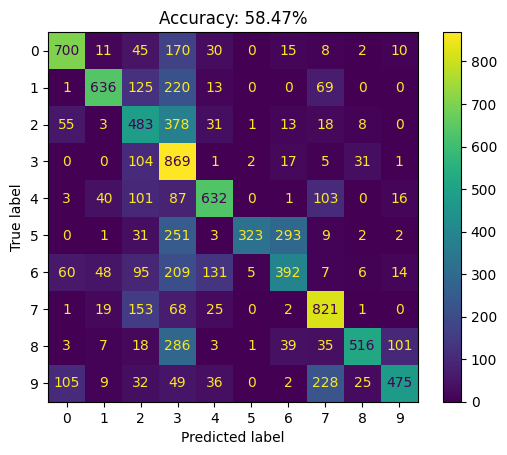

In [28]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title(f'Accuracy: {np.round(100.0 * cm.diagonal().sum()/cm.sum(),2)}%')
plt.show()

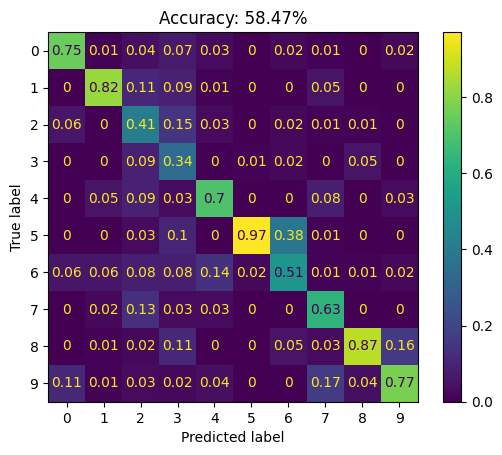

In [29]:
disp = ConfusionMatrixDisplay(np.round(cm/cm.sum(axis=0), 2))
disp.plot()
plt.title(f'Accuracy: {np.round(100.0 * cm.diagonal().sum()/cm.sum(),2)}%')
plt.show()

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

model, preprocess = clip.load("RN50")
model.cuda().eval()
cm = assess_performance2(clip, model, preprocess, mnist_classes, mnist_template, val_loader_gray, f"yeah").numpy()

yeah -> Top-1 accuracy: 57.64
yeah -> Top-3 accuracy: 82.98


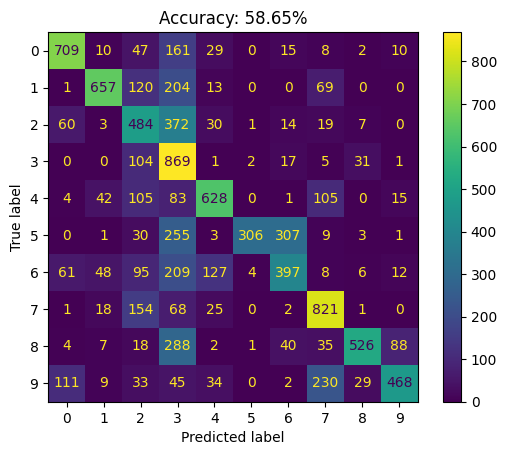

In [31]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title(f'Accuracy: {np.round(100.0 * cm.diagonal().sum()/cm.sum(),2)}%')
plt.show()

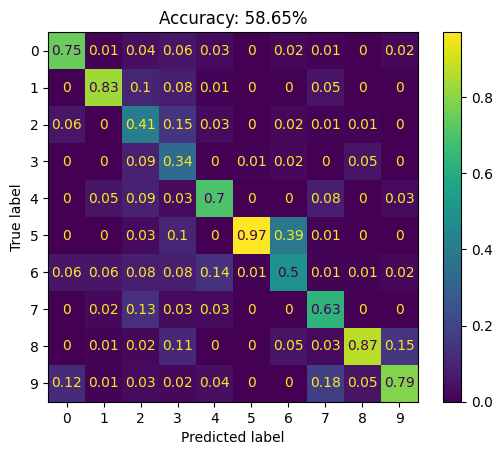

In [32]:
disp = ConfusionMatrixDisplay(np.round(cm/cm.sum(axis=0), 2))
disp.plot()
plt.title(f'Accuracy: {np.round(100.0 * cm.diagonal().sum()/cm.sum(),2)}%')
plt.show()

## Sample random examples from dataset

In [ ]:
from utils.mnist_preprocessing import *
from utils.mnist_plotting import *

In [ ]:
import os
import skimage
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from collections import OrderedDict
import torch

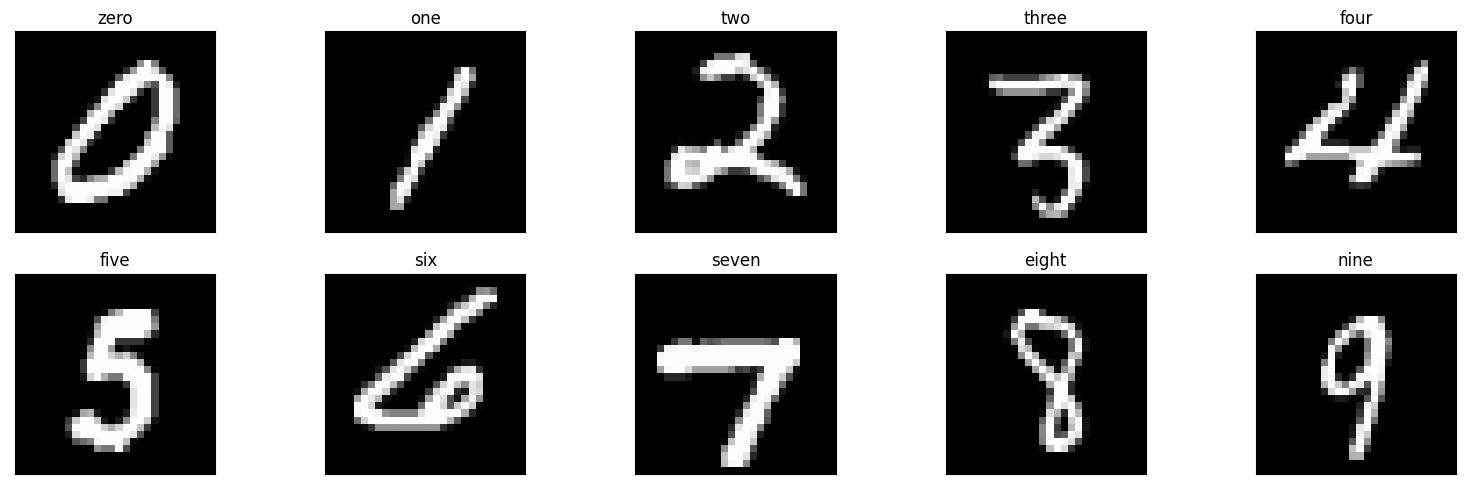

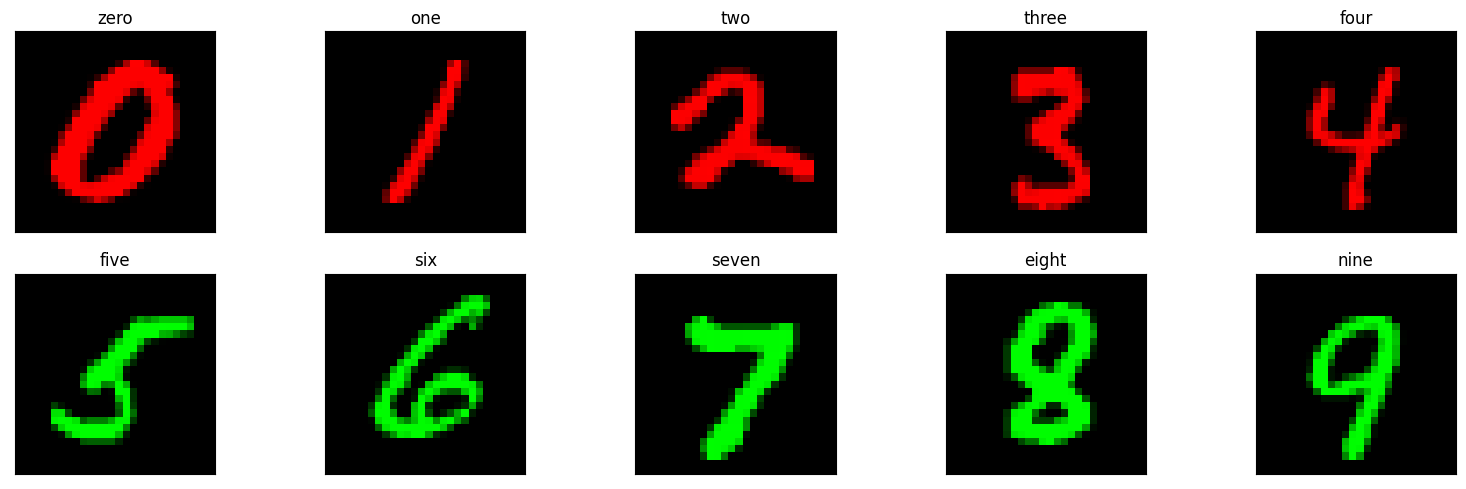

In [33]:
from utils.mnist_general import *

original_gray_images, gray_images, texts = show_examples_0_to_9(val_set_gray, preprocess, descriptions)
original_color_images, color_images, texts = show_examples_0_to_9(val_set_color, preprocess, descriptions)

## Compute similarities

In [39]:
def softmax(input):
    """
    Compute probabilites using the softmax operation.
    """
    return (100.0 * input).softmax(dim=-1)

In [44]:
def clip_inference2(clip_version, model, preprocessed_images, class_labels, class_template):
    """
    Returns either cosine similarity or probabilities
    """
    with torch.no_grad():
        # build text features
        text_features = text_feature_generator(clip_version, model, class_labels, class_template)
        
        # build image features
        image_input = torch.tensor(np.stack(preprocessed_images)).cuda()
        image_features = model.encode_image(image_input)
        image_features /= image_features.norm(dim=-1, keepdim=True)

        # compute cosine similarity
        similarities = text_features @ image_features
        
    return similarities

similarity = (clip_inference2(open_clip, model, gray_images, mnist_classes, mnist_template))

In [ ]:
texts.shape

In [45]:
from utils.clip_utils import *

#TODO fix clip_inference like assess_performance
show_cosine_similarities(similarity.cpu(), original_gray_images, texts)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7fe2460b3790> (for post_execute):


KeyboardInterrupt: 

: 

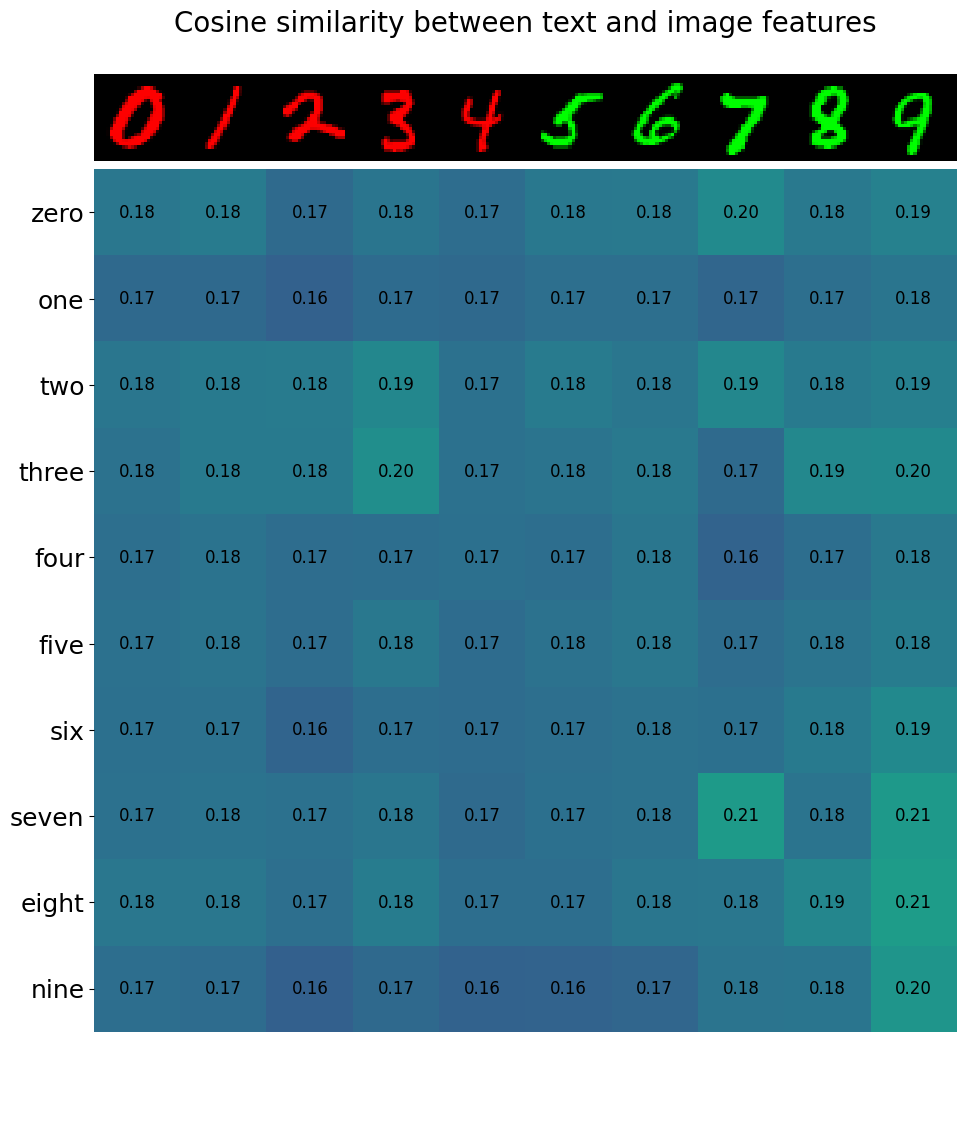

In [36]:
from utils.clip_utils import *

similarity = clip_inference(model, color_images, texts)
show_cosine_similarities(similarity.cpu(), original_color_images, texts)

## Inspect top-k performance

In [ ]:
text_probs = clip_inference(model, gray_images, texts, probabilities=True)
top_probs, top_labels = text_probs.cpu().topk(5, dim=-1)
show_text_img_probs(original_gray_images, top_probs, top_labels, texts)

In [ ]:
text_probs = clip_inference(model, color_images, texts, probabilities=True)
top_probs, top_labels = text_probs.cpu().topk(5, dim=-1)
show_text_img_probs(original_color_images, top_probs, top_labels, texts)